In [1]:
import os
os.chdir("ecc_steganography/module/")

from ecc_editor import *
import ecc_library as e_lib
import interference_and_attacks as iaa
import secret_block as sb
import stat_treak as stat 

os.chdir("../notepads/data/")

In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from pylab import rcParams
rcParams["figure.figsize"] = 14,8

from scipy.stats.kde import gaussian_kde

### Блок подготовки длинной последовательнсоти

In [3]:
p_erorr_global = 0.05
key = b"123_mail_UP"

name_cod_box = stat.selection_g_x(p_erorr_global)
print("Вероятность естественной ошибки",p_erorr_global)
print("Код бокса",name_cod_box)

p_sintetik = stat.selection_sintetik_p(p_erorr_global,name_cod_box[0])
print("Вероятность искуственной ошибки ",p_sintetik)
name_cod_mail = stat.selection_g_x(p_erorr_global,0)
print("Код майла ",name_cod_mail)

print("===================================")

treak_to_box = "long_text.txt"
box_editer = ecc_editor(name_cod_box[0])
long_box = box_editer.cod_work(treak_to_box)
len_box = len(long_box)
print(f"Длинна бокса {len_box} bit")


treak_to_mail = "mail.txt"
mail_editer = ecc_editor(name_cod_mail[0])
long_mail = mail_editer.cod_work(treak_to_mail)

print("Ожидаеммая длинна контенера",len_box * p_sintetik)
print("Реальная длинна контейнера",len(long_mail))


print("===================================")
sicret_ed_in = sb.secret_editor(key)
to_link = sicret_ed_in.merge_sequences(long_box,long_mail,p_sintetik)
print(f"Вероятность искуственной ошибки {sum(to_link != long_box) / len(long_box)}")
dop = 1
from_link = iaa.noise_in_treak(to_link,p_erorr_global * dop)
print(f"Вероятность естественной ошибки {sum(to_link != from_link) / len(from_link)}")
print(f"Полная вероятность в кейсе {sum(long_box != from_link) / len(from_link)}")
full_error = sum(long_box != from_link) / len(from_link)

Вероятность естественной ошибки 0.05
Код бокса ('63_7_15', 95457791829701599)
Вероятность искуственной ошибки  0.06620442158513286
Код майла  ('7_1_3', 127)
Длинна бокса 898065 bit
Ожидаеммая длинна контенера 59455.87387085234
Реальная длинна контейнера 57680
Вероятность искуственной ошибки 0.03285619637776776
Вероятность естественной ошибки 0.04993513832517691
Полная вероятность в кейсе 0.0795911209099564


### Минутка статистики

In [4]:
print("Стат параметры")
print("Вероятность встретить 0 => ",sum(from_link == 0) / len(from_link))
print("Вероятность встретить 1 => ",sum(from_link == 1) / len(from_link))


X1 = from_link == 1
X2 = from_link == 0

print("Вероятности переходов")
print("1 to 1 => ",sum(X1[:-1]&X1[1:]) / sum(X1))
print("1 to 0 => ",sum(X1[:-1]&X2[1:]) / sum(X1))

print("0 to 0 => ",sum(X2[:-1]&X2[1:]) / sum(X2))
print("0 to 1 => ",sum(X2[:-1]&X1[1:]) / sum(X2))

Стат параметры
Вероятность встретить 0 =>  0.49866546408110773
Вероятность встретить 1 =>  0.5013345359188923
Вероятности переходов
1 to 1 =>  0.5017624286199751
1 to 0 =>  0.49823757138002495
0 to 0 =>  0.49909341407753766
0 to 1 =>  0.5009043529522099


In [5]:
class decod_atacl(ecc_strem):
    
    def decoding_work(self,mas_in):
        mas_1 = []
        mas_2 = []
        
        for x in mas_in:
            pol,kol_err = self.decoding_blok(x)
            mas_1.append(pol)
            mas_2.append(kol_err)
            
        return np.array(mas_1),np.array(mas_2)
    
       
    def decoding_blok(self,value):
        n = 0
        work_p = polinom(value,self.n_cod)
        ost = work_p % self.g_x
        
        if sum(ost.main_mas) != 0:       
            while self.t_cod < sum(ost.main_mas):
                n += 1
                work_p = work_p << 1
                ost = work_p % self.g_x
                
                if n > self.n_cod: 
                    break
                
            work_p = work_p + ost
            work_p = work_p >> n
             
        long_pol = work_p / self.g_x
        return polinom(long_pol.main_mas[(self.n_cod - self.k_cod):],self.k_cod).main_mas , sum(ost.main_mas)
    
    def chek_error_blok(self,value):
        n = 0
        work_p = polinom(value,self.n_cod)
        ost = work_p % self.g_x
        
        if sum(ost.main_mas) != 0:       
            while self.t_cod < sum(ost.main_mas):
                n += 1
                work_p = work_p << 1
                ost = work_p % self.g_x
                
                if n > self.n_cod: 
                    break
                
            ost = ost >> n
            work_p = work_p >> n
             
        out = []
        for i in range(len(work_p.main_mas)):
            if ost.main_mas[i] == 1:
                out.append(work_p.main_mas[i])
        return out
    
    def chek_err_work(self,mas_in):
        return [self.chek_error_blok(x) for x in mas_in]
        
        
        

In [6]:
test = decod_atacl(63,7,15)
precoder_test = precoder(63)
mas_work = precoder_test.long_cut(from_link)
u_cod, kol_err =  test.decoding_work(mas_work)

len_mas_work = len(mas_work)

In [7]:
print(len_mas_work)

14255


### Эталон

In [8]:
et_err_cod = []
for i in range(len_mas_work):
    et_err_cod.append(sum(iaa.noise_in_treak(np.zeros(63),full_error)))

In [9]:
ma_den = gaussian_kde(kol_err,bw_method=0.4)
x = np.linspace(0,15,1000)
y = ma_den(x)

ma_den = gaussian_kde(et_err_cod,bw_method=0.4)
y_et = ma_den(x)

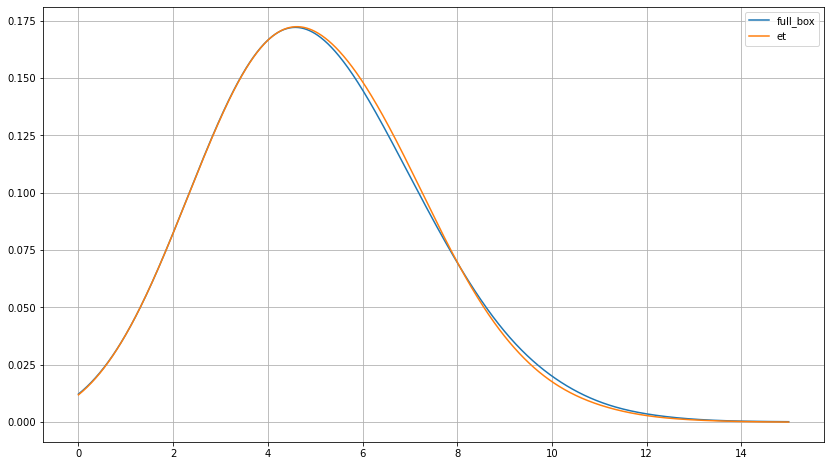

In [10]:
plt.plot(x,y)
plt.plot(x,y_et)
plt.legend(["full_box" , "et"])
plt.grid();

 ###   Проверка стат гипотез

In [11]:
import numpy as np

In [12]:
def stat_test(mas):
    print("M   => ",np.mean(mas))
    print("D   => ",np.var(mas))
    print("Med => ",np.median(mas))
    print("std => ",np.std(mas))
    
    print(end="|")
    for i in range(1,10):
        print(str(i*10)+"% =",np.percentile(mas,i*10),end="|")
    print()

In [13]:
print("----------------------------------------------------------------------------------------------")
stat_test(kol_err)
print("----------------------------------------------------------------------------------------------")
stat_test(et_err_cod)
print("----------------------------------------------------------------------------------------------")

----------------------------------------------------------------------------------------------
M   =>  5.0157137846369695
D   =>  4.743492115906091
Med =>  5.0
std =>  2.177955949027916
|10% = 2.0|20% = 3.0|30% = 4.0|40% = 4.0|50% = 5.0|60% = 5.0|70% = 6.0|80% = 7.0|90% = 8.0|
----------------------------------------------------------------------------------------------
M   =>  4.988986320589267
D   =>  4.47669385144388
Med =>  5.0
std =>  2.115819900521753
|10% = 2.0|20% = 3.0|30% = 4.0|40% = 4.0|50% = 5.0|60% = 5.0|70% = 6.0|80% = 7.0|90% = 8.0|
----------------------------------------------------------------------------------------------


### Извлечение данных

In [14]:
test.chek_error_blok(mas_work[0])

[0, 0, 0, 1, 0, 0, 0, 1, 1]

In [15]:
test.decoding_blok(mas_work[0])

(array([0., 1., 0., 0., 1., 0., 0.]), 9.0)

In [16]:
mail_out  =  test.chek_err_work(mas_work)

In [17]:
mail_out[:5]

[[0, 0, 0, 1, 0, 0, 0, 1, 1], [1, 0, 1, 0, 1], [1], [1, 1, 0, 0], [0, 1, 0, 0]]

In [18]:
long_mail =  scotch_global(mail_out)
long_mail[:100]

array([0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0.])

In [19]:
mail_out = ecc_editor('7_1_3')

In [20]:
f_out = FailBin("out_mail_find.txt")

In [21]:
long_error_walue = mail_out.decoding_work(long_mail) 
f_out.write_bin(long_error_walue)

In [22]:
def test_bin(from_link):
    print("Стат параметры")
    print("Вероятность встретить 0 => ",sum(from_link == 0) / len(from_link))
    print("Вероятность встретить 1 => ",sum(from_link == 1) / len(from_link))


    X1 = from_link == 1
    X2 = from_link == 0

    print("Вероятности переходов")
    print("1 to 1 => ",sum(X1[:-1]&X1[1:]) / sum(X1))
    print("1 to 0 => ",sum(X1[:-1]&X2[1:]) / sum(X1))

    print("0 to 0 => ",sum(X2[:-1]&X2[1:]) / sum(X2))
    print("0 to 1 => ",sum(X2[:-1]&X1[1:]) / sum(X2))

In [23]:
test_bin(long_error_walue)

Стат параметры
Вероятность встретить 0 =>  0.531081742535487
Вероятность встретить 1 =>  0.468918257464513
Вероятности переходов
1 to 1 =>  0.5160751565762004
1 to 0 =>  0.4839248434237996
0 to 0 =>  0.5725345622119815
0 to 1 =>  0.4272811059907834


In [24]:
test_bin(long_mail)

Стат параметры
Вероятность встретить 0 =>  0.5183289276773102
Вероятность встретить 1 =>  0.48167107232268985
Вероятности переходов
1 to 1 =>  0.5361944307325996
1 to 0 =>  0.4637765324196405
0 to 0 =>  0.5689962223421479
0 to 1 =>  0.43100377765785214


In [25]:
test_bin(long_box)

Стат параметры
Вероятность встретить 0 =>  0.49574808059550257
Вероятность встретить 1 =>  0.5042519194044974
Вероятности переходов
1 to 1 =>  0.5028938878350716
1 to 0 =>  0.4971061121649284
0 to 0 =>  0.4943645078546497
0 to 1 =>  0.5056332460344912


In [26]:
def auto_kor_for_step(value,step=1):
    if step == 0 :
        out = 1
    else:
        out = np.corrcoef(value[:-step],value[step:])[0][1]
    return out

def auto_kor(value,delta_max = 10):
    return np.array([auto_kor_for_step(value,x) for x in range(delta_max)])

In [27]:
auto_kor(long_error_walue)

array([ 1.        ,  0.08871527, -0.02755721, -0.02195701,  0.00409326,
        0.01973849, -0.01005419,  0.00302374,  0.00608463,  0.0282156 ])

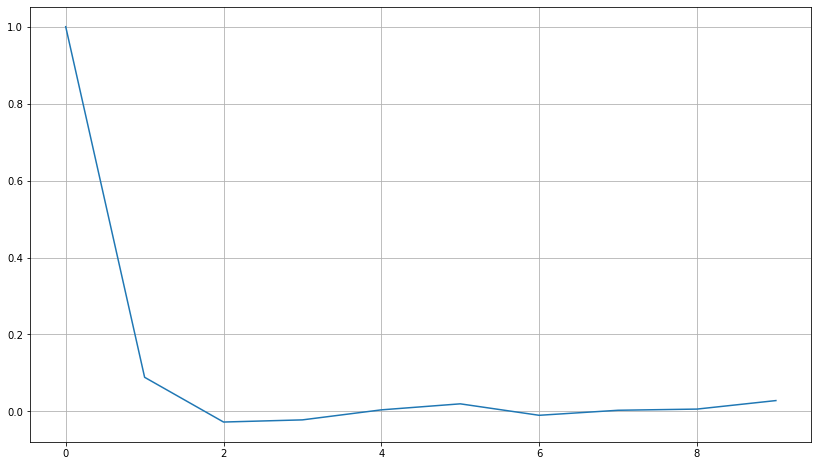

In [28]:
plt.plot(auto_kor(long_error_walue))
plt.grid();

### Длинный текст с настоящим текстом

In [29]:
p_erorr_et = full_error
print("Вероятность ошибки ",p_erorr_et)
name_cod_et = stat.selection_g_x(p_erorr_et)
print("Выбранный код", name_cod_et)

treak_to_box = "long_text.txt"
et_editer = ecc_editor(name_cod_box[0])
et_box = et_editer.cod_work(treak_to_box)
len_box = len(long_box)
print(f"Длинна бокса {len_box} bit")
print("===================================")
et_link = iaa.noise_in_treak(et_box,p_erorr_et * dop)
print(f"Полная вероятность в кейсе {sum(et_link != et_box) / len(et_box)}")



Вероятность ошибки  0.0795911209099564
Выбранный код ('63_7_15', 95457791829701599)
Длинна бокса 898065 bit
Полная вероятность в кейсе 0.07910229215034546


In [30]:
test_bin(et_link)

Стат параметры
Вероятность встретить 0 =>  0.49670012749633935
Вероятность встретить 1 =>  0.5032998725036606
Вероятности переходов
1 to 1 =>  0.5025486951211957
1 to 0 =>  0.49745130487880423
0 to 0 =>  0.4959367272776185
0 to 1 =>  0.5040610309167416


In [31]:
test_bin(et_box)

Стат параметры
Вероятность встретить 0 =>  0.49574808059550257
Вероятность встретить 1 =>  0.5042519194044974
Вероятности переходов
1 to 1 =>  0.5028938878350716
1 to 0 =>  0.4971061121649284
0 to 0 =>  0.4943645078546497
0 to 1 =>  0.5056332460344912
